In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from peakfit import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test peak fit

## Implemented peak function

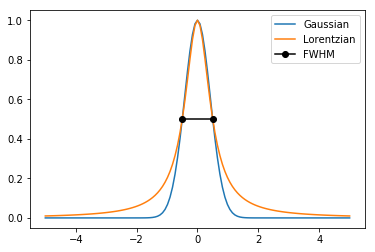

In [62]:
peak_functions = [Gauss(), Lorentzian()]

x = np.linspace(-5, 5, 123)
for f in peak_functions:
    y = f(x, 0, 1, 1)
    plt.plot(x, y, label=f.name);

plt.plot([-.5, .5], [.5, .5], '-ok', label='FWHM'); # test FWHM
plt.legend();

## Simple fit

{'x0': 0.5245303649979836, 'fwhm': 1.0589350763612955, 'amplitude': 0.8981417133942248}
{'slope': 0.0011523066888828963, 'intercept': 6.993703785318166}


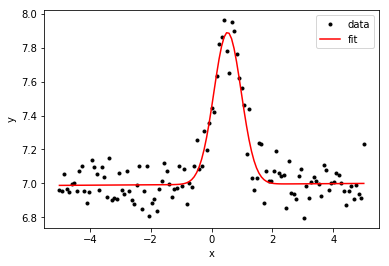

In [58]:
# Generate data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Gauss())

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

{'x0': 0.5100187045830973, 'fwhm': 0.9664359975438475, 'amplitude': 0.9669325213402176}
{'slope': 0.09752223970898523, 'intercept': 7.019829543315639}


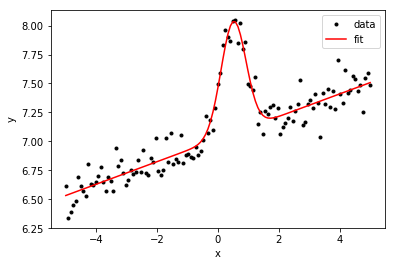

In [57]:
# Generate data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using manual estimation of initial parameters:
results, fit = peakfit(x, y, Gauss(0, 1, 1))

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

{'x0': 0.5784590965817326, 'fwhm': 1.1565453720048693, 'amplitude': 1.0208456252818259}


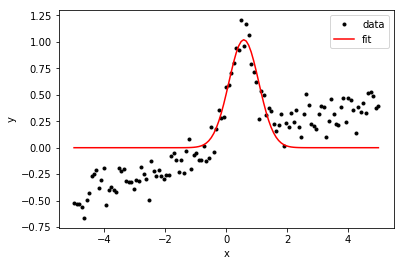

In [70]:
# Generate data
x = np.linspace(-5, 5, 123)
y = 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit without the linear background:
results, fit = peakfit(x, y, Gauss(0.6, 1, 1), background=None)

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Multi-peak

{'x0': -1.5214172158898343, 'fwhm': 1.5349127958276798, 'amplitude': 0.9734688416889997}
{'x0': 0.47501690641258304, 'fwhm': 1.0405425727153705, 'amplitude': 0.7642512275271763}
{'slope': 0.001603338777341951, 'intercept': 0.0002567187101945638}


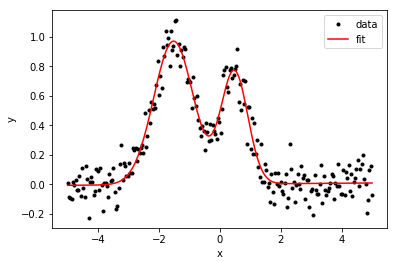

In [55]:
# Generate data
x = np.linspace(-5, 5, 234)
y = 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 0.8)
y += Gauss()(x, -1.5, 1.5, 1.)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Sum(Gauss(-2, 1, 1), Gauss(1, 1, 1)))

for r in results:
    print(r)
    
# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();